# Unsupervised Learning Modeling

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import pickle
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',35)

In [2]:
# prelabeled set used for initial training
prelabeled_df = pd.read_csv('data/finalized_data/training')

# unlabeled set used for predictions after initial training
unlabeled_df = pd.read_csv('data/finalized_data/unlabeled')

In [3]:
prelabeled_df.drop('Class', axis=1, inplace=True)
unlabeled_df.drop('Class', axis=1, inplace=True)

In [4]:
prelabeled_df

,Player,GP,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Pos,TEAM
0,Aaron Gordon: 2015,78.0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,0.8,0.8,0.7,4.3,60.5,1.3,31.7,0.6,2.2,1.7,30.5,18.9,10.3,13.3,16.9,81.0,PF,ORL
1,Al Horford: 2015,82.0,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,1.3,0.8,1.5,5.6,64.3,4.1,44.4,3.8,2.1,3.0,35.1,22.9,16.5,10.9,20.2,82.0,C,ATL
2,Al Jefferson: 2015,47.0,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,0.7,0.6,0.9,6.8,51.5,4.0,43.9,11.3,0.0,0.0,0.0,25.3,11.4,13.3,24.0,82.0,C,CHA
3,Andre Drummond: 2015,81.0,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,1.9,1.5,1.4,12.2,54.1,0.8,25.0,6.0,0.9,0.0,0.0,24.6,4.2,21.7,23.9,83.0,C,DET
4,Andrew Bogut: 2015,70.0,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,1.2,0.5,1.6,3.8,65.8,0.1,30.0,2.5,0.1,0.0,0.0,12.4,14.5,16.3,11.5,84.0,C,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Nikola Vucevic: 2020,44.0,34.1,24.5,20.6,48.0,6.5,40.6,11.8,3.8,1.9,1.0,0.6,8.5,55.3,5.6,46.0,11.1,3.5,6.5,40.6,34.7,21.3,16.8,29.9,83.0,C,CHI
348,Patty Mills: 2020,40.0,25.6,13.1,10.3,44.3,6.9,39.5,1.8,2.6,1.1,0.7,0.0,2.1,57.1,1.3,50.9,0.0,3.8,4.1,43.9,24.0,14.7,3.1,19.4,73.0,PG,SAS
349,Stephen Curry: 2020,39.0,33.7,29.0,20.2,47.5,11.4,40.8,5.3,6.2,3.1,1.4,0.1,6.5,60.0,2.3,46.6,0.2,10.2,5.0,41.8,38.9,30.4,7.4,30.7,75.0,PG,GSW
350,Victor Oladipo: 2020,29.0,33.4,20.8,18.4,41.1,7.7,33.3,5.0,4.7,2.4,1.3,0.4,8.2,51.2,2.6,29.7,0.0,12.9,3.6,39.4,29.7,23.6,7.2,28.9,76.0,SG,MIA


In [5]:
df = pd.concat([prelabeled_df, unlabeled_df])
df

,Player,GP,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Pos,TEAM
0,Aaron Gordon: 2015,78.0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,0.8,0.8,0.7,4.3,60.5,1.3,31.7,0.6,2.2,1.7,30.5,18.9,10.3,13.3,16.9,81.0,PF,ORL
1,Al Horford: 2015,82.0,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,1.3,0.8,1.5,5.6,64.3,4.1,44.4,3.8,2.1,3.0,35.1,22.9,16.5,10.9,20.2,82.0,C,ATL
2,Al Jefferson: 2015,47.0,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,0.7,0.6,0.9,6.8,51.5,4.0,43.9,11.3,0.0,0.0,0.0,25.3,11.4,13.3,24.0,82.0,C,CHA
3,Andre Drummond: 2015,81.0,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,1.9,1.5,1.4,12.2,54.1,0.8,25.0,6.0,0.9,0.0,0.0,24.6,4.2,21.7,23.9,83.0,C,DET
4,Andrew Bogut: 2015,70.0,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,1.2,0.5,1.6,3.8,65.8,0.1,30.0,2.5,0.1,0.0,0.0,12.4,14.5,16.3,11.5,84.0,C,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,Wayne Ellington: 2020,31.0,23.2,10.7,8.0,45.8,6.4,43.1,1.8,1.5,0.7,0.4,0.2,1.1,63.6,0.7,40.0,0.0,1.9,4.0,41.6,22.4,9.4,3.9,16.8,76.0,SG,DET
1027,Wendell Carter Jr: 2020,32.0,24.7,10.9,7.9,51.2,0.7,36.4,7.8,2.2,1.5,0.6,0.8,5.9,55.9,1.2,38.5,2.5,1.0,0.7,36.4,20.6,12.6,15.4,18.5,82.0,C,ORL
1028,Wesley Matthews: 2020,37.0,20.1,4.5,4.1,35.9,3.3,34.7,1.4,1.0,0.5,0.5,0.4,0.6,50.0,0.3,20.0,0.3,1.2,2.8,34.3,10.7,6.5,3.5,10.1,76.0,SG,LAL
1029,Will Barton: 2020,41.0,30.7,12.7,11.0,43.5,4.7,37.7,4.1,3.1,1.7,0.9,0.4,5.2,50.0,1.2,41.7,0.0,6.1,2.9,39.2,20.1,13.2,6.8,19.0,78.0,SF,DEN


In [6]:
ss = StandardScaler()

In [7]:
predictors = df.drop(['Player', 'GP', 'TEAM'], axis=1)
predictors = pd.get_dummies(predictors)
predictors

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,23.9,9.2,7.4,47.3,1.8,29.6,6.5,1.6,0.8,0.8,0.7,4.3,60.5,1.3,31.7,0.6,2.2,1.7,30.5,18.9,10.3,13.3,16.9,81.0,0,1,0,0,0
1,32.1,15.2,12.8,50.5,3.1,34.4,7.3,3.2,1.3,0.8,1.5,5.6,64.3,4.1,44.4,3.8,2.1,3.0,35.1,22.9,16.5,10.9,20.2,82.0,1,0,0,0,0
2,23.3,12.0,10.7,48.5,0.0,0.0,6.4,1.5,0.7,0.6,0.9,6.8,51.5,4.0,43.9,11.3,0.0,0.0,0.0,25.3,11.4,13.3,24.0,82.0,1,0,0,0,0
3,32.9,16.2,13.1,52.1,0.1,33.3,14.8,0.8,1.9,1.5,1.4,12.2,54.1,0.8,25.0,6.0,0.9,0.0,0.0,24.6,4.2,21.7,23.9,83.0,1,0,0,0,0
4,20.7,5.4,4.0,62.7,0.0,100.0,7.0,2.3,1.2,0.5,1.6,3.8,65.8,0.1,30.0,2.5,0.1,0.0,0.0,12.4,14.5,16.3,11.5,84.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,23.2,10.7,8.0,45.8,6.4,43.1,1.8,1.5,0.7,0.4,0.2,1.1,63.6,0.7,40.0,0.0,1.9,4.0,41.6,22.4,9.4,3.9,16.8,76.0,0,0,0,0,1
1027,24.7,10.9,7.9,51.2,0.7,36.4,7.8,2.2,1.5,0.6,0.8,5.9,55.9,1.2,38.5,2.5,1.0,0.7,36.4,20.6,12.6,15.4,18.5,82.0,1,0,0,0,0
1028,20.1,4.5,4.1,35.9,3.3,34.7,1.4,1.0,0.5,0.5,0.4,0.6,50.0,0.3,20.0,0.3,1.2,2.8,34.3,10.7,6.5,3.5,10.1,76.0,0,0,0,0,1
1029,30.7,12.7,11.0,43.5,4.7,37.7,4.1,3.1,1.7,0.9,0.4,5.2,50.0,1.2,41.7,0.0,6.1,2.9,39.2,20.1,13.2,6.8,19.0,78.0,0,0,0,1,0


In [8]:
predictors_no_pos = df.drop(['Player', 'GP', 'TEAM', 'Pos'], axis=1)

In [9]:
predictors_scaled = ss.fit_transform(predictors_no_pos)
predictors_scaled = pd.DataFrame(predictors_scaled, columns=predictors_no_pos.columns)

In [10]:
predictors_scaled

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height
0,-0.878299,-0.735668,-0.797310,0.197616,-0.828947,-0.304096,0.555806,-0.689773,-1.067040,-0.286707,0.317656,-0.287858,0.886198,-0.420338,-0.621926,-0.353804,-0.731458,-0.543946,-0.335079,-0.517444,-0.583652,1.075683,-0.586310,0.700175
1,0.873664,0.327050,0.524819,0.725357,-0.249490,0.146117,0.868867,0.114024,-0.447824,-0.286707,1.983316,0.217996,1.462143,1.352387,0.696773,1.089992,-0.753816,0.324041,0.064881,0.091288,0.077080,0.497142,0.020241,0.994325
2,-1.006491,-0.239733,0.010657,0.395519,-1.631273,-3.080409,0.516674,-0.740010,-1.190884,-0.816455,0.734071,0.684938,-0.477883,1.289076,0.644855,4.473889,-1.223322,-1.679006,-2.986984,0.456526,-0.466425,1.075683,0.718694,0.994325
3,1.044587,0.504170,0.598270,0.989227,-1.586699,0.042943,3.803806,-1.091671,0.295236,1.567410,1.775108,2.786177,-0.083815,-0.736896,-1.317618,2.082601,-1.022105,-1.679006,-2.986984,0.349999,-1.233727,3.100576,0.700314,1.288476
4,-1.561991,-1.408723,-1.629761,2.737366,-1.631273,6.299028,0.751469,-0.338112,-0.571667,-1.081329,2.191523,-0.482417,1.689490,-1.180077,-0.798445,0.503450,-1.200964,-1.679006,-2.986984,-1.506632,-0.136059,1.798859,-1.578849,1.582626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,-1.027856,-0.469988,-0.650407,-0.049762,1.221440,0.962128,-1.283422,-0.740010,-1.190884,-1.346203,-0.723382,-1.533036,1.356048,-0.800207,0.239901,-0.624516,-0.798531,0.991723,0.630041,0.015196,-0.679564,-1.190269,-0.604691,-0.770576
1379,-0.707375,-0.434564,-0.674891,0.840800,-1.319258,0.333706,1.064529,-0.388349,-0.200137,-0.816455,0.525863,0.334732,0.189001,-0.483649,0.084149,0.503450,-0.999748,-1.211628,0.177913,-0.258733,-0.338542,1.581906,-0.292225,0.994325
1380,-1.690184,-1.568131,-1.605278,-1.682458,-0.160343,0.174255,-1.439953,-0.991197,-1.438570,-1.081329,-0.306967,-1.727595,-0.705230,-1.053454,-1.836790,-0.489160,-0.955033,0.190504,-0.004677,-1.765343,-0.988616,-1.286692,-1.836174,-0.770576
1381,0.574548,-0.115749,0.084109,-0.429075,0.463688,0.455639,-0.383374,0.063786,0.047549,-0.021833,-0.306967,0.062349,-0.705230,-0.483649,0.416419,-0.624516,0.140482,0.257272,0.421366,-0.334824,-0.274600,-0.491198,-0.200323,-0.182275


In [23]:
k_means_5 = KMeans(n_clusters=5, random_state=17).fit(predictors_scaled)
k_means_6 = KMeans(n_clusters=6, random_state=17).fit(predictors_scaled)
k_means_7 = KMeans(n_clusters=7, random_state=17).fit(predictors_scaled)
k_means_8 = KMeans(n_clusters=8, random_state=17).fit(predictors_scaled)
k_means_9 = KMeans(n_clusters=9, random_state=17).fit(predictors_scaled)
k_means_10 = KMeans(n_clusters=10, random_state=17).fit(predictors_scaled)
k_means_11 = KMeans(n_clusters=11, random_state=17).fit(predictors_scaled)
k_means_12 = KMeans(n_clusters=12, random_state=17).fit(predictors_scaled)
k_means_13 = KMeans(n_clusters=13, random_state=17).fit(predictors_scaled)
k_means_14 = KMeans(n_clusters=14, random_state=17).fit(predictors_scaled)
k_means_15 = KMeans(n_clusters=15, random_state=17).fit(predictors_scaled)

k_list = [k_means_5, k_means_6, k_means_7, k_means_8, k_means_9, k_means_10,
          k_means_11, k_means_12, k_means_13, k_means_14, k_means_15]

In [24]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(predictors_scaled, labels))

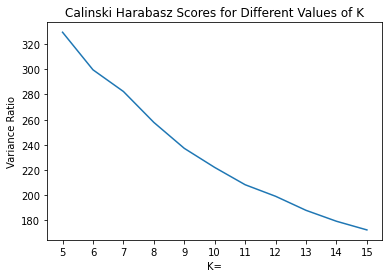

In [25]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], CH_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [26]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

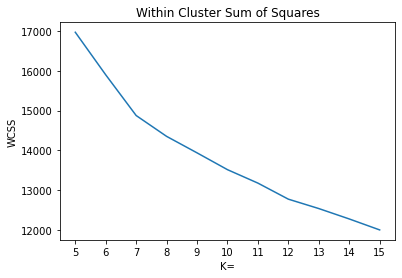

In [27]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], wcss_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

In [28]:
sil_score = []

for model in k_list:
    labels = model.labels_
    sil_score.append(silhouette_score(predictors_scaled, labels))

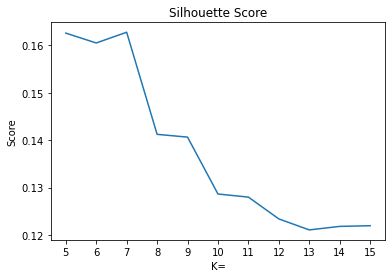

In [29]:
plt.plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], sil_score)
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.xlabel('K=')
plt.show()

We want the number of clusters to be greater than the 5 (number of basketball positions). By looking at the silhouette score, it seems that 7 clusters is ideal. The silhouette score drops drastically after that.

In [30]:
k_means_7.labels_

array([5, 5, 3, ..., 0, 4, 6], dtype=int32)

In [31]:
df['Class']=k_means_7.labels_

#Analyze labels
clusters=pd.DataFrame(columns=(predictors_scaled.columns))
for i in range(7):
    a=df[df['Class']==i].mean()
    clusters=clusters.append(a, ignore_index=True)
    

Let's take a look at each cluster and the average stats for each one

In [32]:
clusters

,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height,Class,GP
0,24.577808,8.536438,7.207945,42.887945,3.661644,35.983836,3.556164,1.687123,0.961644,0.772055,0.358356,2.535068,53.764932,1.018904,35.893699,0.285753,2.827123,3.011781,37.151781,16.704110,9.909589,7.011781,15.182192,78.249315,0.0,60.608219
1,26.362562,10.761576,9.285222,42.793596,3.117241,34.017734,3.304926,4.522167,1.830049,0.995074,0.266995,4.320690,49.715764,1.855172,38.459606,0.228571,8.454680,1.900985,35.918227,19.632020,25.323645,6.062069,19.542857,74.965517,1.0,59.467980
2,32.843617,21.328723,15.902128,49.760638,3.318085,34.042553,9.246809,3.727660,2.519149,0.985106,1.195745,8.711702,58.081915,3.886170,39.981915,7.194681,4.687234,2.580851,35.802128,31.258511,18.487234,13.900000,27.124468,82.531915,2.0,59.808511
3,26.664815,11.001852,7.842593,57.703704,0.067593,2.587963,9.038889,1.578704,1.484259,0.732407,1.199074,6.881481,60.725926,0.886111,31.386111,2.562037,0.981481,0.050926,2.071296,19.857407,8.967593,16.367593,17.116667,82.888889,3.0,64.518519
4,30.500000,15.220949,12.452569,43.935178,5.389328,36.962846,4.473123,2.453360,1.575889,0.891700,0.385771,4.802767,53.198419,2.271146,38.718972,0.992095,5.740316,3.944664,38.496443,24.046245,12.374308,7.158893,21.327273,78.545455,4.0,60.837945
5,25.690805,11.472414,8.879310,51.227586,1.848276,33.829310,6.671264,1.795402,1.395977,0.763793,0.910345,5.601724,59.632759,1.436782,37.515517,2.244253,2.005172,1.661494,34.686207,21.473563,10.471839,12.770690,18.795402,81.770115,5.0,63.356322
6,33.670430,22.189785,17.122581,45.584946,5.848387,35.825806,4.937634,6.042473,2.886022,1.301613,0.398925,7.611290,53.845161,3.666667,41.637634,0.909140,13.286559,2.459140,39.222581,31.482796,29.045161,7.123656,28.016667,76.032258,6.0,60.774194


In [33]:
cols = (list(predictors_scaled.columns))
cols.insert(0, 'Class')

In [34]:
#Show information we want
cluster_comparison = clusters[cols].round(2)
cluster_comparison

,Class,MIN,PTS,FGA,FG%,3PA,3P%,REB,AST,TO,STL,BLK,Close FGA,Close FG%,Mid FGA,Mid FG%,Post_Ups,Drives,CS_3PA,CS_3P%,PP100Pos,AST %,REB %,USG %,Height
0,0.0,24.58,8.54,7.21,42.89,3.66,35.98,3.56,1.69,0.96,0.77,0.36,2.54,53.76,1.02,35.89,0.29,2.83,3.01,37.15,16.70,9.91,7.01,15.18,78.25
1,1.0,26.36,10.76,9.29,42.79,3.12,34.02,3.30,4.52,1.83,1.00,0.27,4.32,49.72,1.86,38.46,0.23,8.45,1.90,35.92,19.63,25.32,6.06,19.54,74.97
2,2.0,32.84,21.33,15.90,49.76,3.32,34.04,9.25,3.73,2.52,0.99,1.20,8.71,58.08,3.89,39.98,7.19,4.69,2.58,35.80,31.26,18.49,13.90,27.12,82.53
3,3.0,26.66,11.00,7.84,57.70,0.07,2.59,9.04,1.58,1.48,0.73,1.20,6.88,60.73,0.89,31.39,2.56,0.98,0.05,2.07,19.86,8.97,16.37,17.12,82.89
4,4.0,30.50,15.22,12.45,43.94,5.39,36.96,4.47,2.45,1.58,0.89,0.39,4.80,53.20,2.27,38.72,0.99,5.74,3.94,38.50,24.05,12.37,7.16,21.33,78.55
5,5.0,25.69,11.47,8.88,51.23,1.85,33.83,6.67,1.80,1.40,0.76,0.91,5.60,59.63,1.44,37.52,2.24,2.01,1.66,34.69,21.47,10.47,12.77,18.80,81.77
6,6.0,33.67,22.19,17.12,45.58,5.85,35.83,4.94,6.04,2.89,1.30,0.40,7.61,53.85,3.67,41.64,0.91,13.29,2.46,39.22,31.48,29.05,7.12,28.02,76.03


In [36]:
#pickle.dump(k_means_7, open("kmeans_model.pkl", "wb"))

In [ ]:
k_means_7 = pickle.load(open("kmeans_model.pkl", "rb"))

At this point, we can determine classifications for these clusters by observing the corresponding statistics

- 0: Role Player - Contributes but does not excel in any area, mostly shoots catch-and-shoot 3s
- 1: Pass-First Guard - High assist rate, drives in a lot
- 2: High-Usage Big - Scores a lot, rebounds well, takes a lot of shots inside the paint at a high percentage
- 3: Traditional Big - Rebounds and blocks shots well, rarely shoots and almost exclusively takes shots inside
- 4: Perimeter Scorer - Takes a lot of 3-pointers (mostly catch-and-shoot), some contributions in other areas
- 5: Athletic Wing - Mostly takes shots/dunks from inside, only shoots catch-and-shoot 3s, rebounds well
- 6: Ball-Dominant Scorer - "Best" player on a team, main contributor in anything offensive related

In [53]:
classes = ['Role Player', 'Pass-First Guard', 'High-Usage Big', 'Traditional Big', 'Perimeter Scorer', 
           'Athletic Wing', 'Ball-Dominant Scorer']

In [312]:
# list of good teams and bad teams (top and bottom 8)
good_2015 = ['GSW', 'SAS', 'CLE', 'TOR', 'OKC', 'LAC', 'ATL', 'BOS']
bad_2015 = ['PHI', 'LAL', 'BKN', 'PHX', 'MIN', 'NOP', 'NYK', 'SAC']

good_2016 = ['GSW', 'SAS', 'HOU', 'BOS', 'CLE', 'LAC', 'TOR', 'UTA']
bad_2016 = ['BKN', 'PHX', 'LAL', 'PHI', 'ORL', 'NYK', 'MIN', 'SAC']

good_2017 = ['HOU', 'TOR', 'GSW', 'BOS', 'PHI', 'CLE', 'POR', 'IND']
bad_2017 = ['PHX', 'MEM', 'DAL', 'ATL', 'ORL', 'SAC', 'CHI', 'BKN']

good_2018 = ['MIL', 'TOR', 'GSW', 'DEN', 'HOU', 'POR', 'PHI','UTA']
bad_2018 = ['NYK', 'PHX', 'CLE', 'CHI', 'ATL', 'WAS', 'NOP', 'MEM']

good_2019 = ['MIL', 'TOR', 'LAL', 'LAC', 'BOS', 'DEN', 'IND', 'HOU']
bad_2019 = ['GSW', 'MIN', 'CLE', 'DET', 'ATL', 'NYK', 'CHI', 'CHA']

good_2020 = ['UTA', 'PHI', 'PHO', 'LAC', 'MIL', 'BKN', 'LAL', 'DEN']
bad_2020 = ['MIN', 'DET', 'ORL', 'HOU', 'WAS', 'CLE', 'TOR', 'OKC']

In [247]:
df.reset_index(drop=True, inplace=True)

Now we want to separate the results by year so we can look at team composition by year

In [346]:
#df.to_csv('results/kmeans_results.csv', index=False)

In [362]:
df = pd.read_csv('results/kmeans_results.csv')

In [363]:
df_2015 = df[df['Player'].str.contains('2015')]
df_2016 = df[df['Player'].str.contains('2016')]
df_2017 = df[df['Player'].str.contains('2017')]
df_2018 = df[df['Player'].str.contains('2018')]
df_2019 = df[df['Player'].str.contains('2019')]
df_2020 = df[df['Player'].str.contains('2020')]

df_2015.reset_index(drop=True, inplace=True)
df_2016.reset_index(drop=True, inplace=True)
df_2017.reset_index(drop=True, inplace=True)
df_2018.reset_index(drop=True, inplace=True)
df_2019.reset_index(drop=True, inplace=True)
df_2020.reset_index(drop=True, inplace=True)

Now that we have each year, we can see the team compositions of the top 8, bottom 8, and middle 14 teams in the NBA.

In [364]:
classes = ['Pass-First Guard', 'High-Usage Big', 'Traditional Big', 'Perimeter Scorer', 
           'Athletic Wing', 'Ball-Dominant Scorer']

In [365]:
# %load radar_plotting.py
import pandas as pd
import plotly.graph_objects as go


# In[4]:


# list of good teams and bad teams (top and bottom 8)
good_2015 = ['GSW', 'SAS', 'CLE', 'TOR', 'OKC', 'LAC', 'ATL', 'BOS']
bad_2015 = ['PHI', 'LAL', 'BKN', 'PHX', 'MIN', 'NOP', 'NYK', 'SAC']

good_2016 = ['GSW', 'SAS', 'HOU', 'BOS', 'CLE', 'LAC', 'TOR', 'UTA']
bad_2016 = ['BKN', 'PHX', 'LAL', 'PHI', 'ORL', 'NYK', 'MIN', 'SAC']

good_2017 = ['HOU', 'TOR', 'GSW', 'BOS', 'PHI', 'CLE', 'POR', 'IND']
bad_2017 = ['PHX', 'MEM', 'DAL', 'ATL', 'ORL', 'SAC', 'CHI', 'BKN']

good_2018 = ['MIL', 'TOR', 'GSW', 'DEN', 'HOU', 'POR', 'PHI','UTA']
bad_2018 = ['NYK', 'PHX', 'CLE', 'CHI', 'ATL', 'WAS', 'NOP', 'MEM']

good_2019 = ['MIL', 'TOR', 'LAL', 'LAC', 'BOS', 'DEN', 'IND', 'HOU']
bad_2019 = ['GSW', 'MIN', 'CLE', 'DET', 'ATL', 'NYK', 'CHI', 'CHA']

good_2020 = ['UTA', 'PHI', 'PHO', 'LAC', 'MIL', 'BKN', 'LAL', 'DEN']
bad_2020 = ['MIN', 'DET', 'ORL', 'HOU', 'WAS', 'CLE', 'TOR', 'OKC']

# This function creates radar plots. Classes refers to a list that contains the names of each player class,
# year refers to the season you want to look at and good/bad/average give you the option of which teams you want
# shown on the radar plot

def plot_radar(df, classes, year, good=True, bad=True, average=False):
    top_5_df = pd.DataFrame(df.groupby('TEAM')['MIN'].nlargest()).reset_index()['level_1']
    
    temp = df.merge(top_5_df, left_index=True, right_on='level_1', how='inner').reset_index(drop=True)

    if year == 2015:
        good_teams = good_2015
        bad_teams = bad_2015
    elif year == 2016:
        good_teams = good_2016
        bad_teams = bad_2016
    elif year == 2017:
        good_teams = good_2017
        bad_teams = bad_2017
    elif year == 2018:
        good_teams = good_2018
        bad_teams = bad_2018
    elif year == 2019:
        good_teams = good_2019
        bad_teams = bad_2019
    elif year == 2020:
        good_teams = good_2020
        bad_teams = bad_2020
    else:
        return "Please enter a year between 2015 and 2020, inclusive"
    
    good_df = pd.DataFrame(temp[temp['TEAM'].isin(good_teams)]['Class'].value_counts().sort_index())
    good_df['Class'] = good_df['Class'] / 8
    good_df = good_df.drop(0)

    bad_df = pd.DataFrame(temp[temp['TEAM'].isin(bad_teams)]['Class'].value_counts().sort_index())
    bad_df['Class'] = bad_df['Class'] / 8
    bad_df = bad_df.drop(0)
    
    avg_df = temp.drop(temp[temp['TEAM'].isin(good_teams + bad_teams)].index)['Class'].value_counts().sort_index()
    avg_df = avg_df / 14
    avg_df = avg_df.drop(0)
    
    fig = go.Figure()
    
    if good:
        fig.add_trace(go.Scatterpolar(
            r=good_df['Class'],
            theta=classes[1:],
              fill='toself',
              name='Good Teams'
        ))
    if bad:
        fig.add_trace(go.Scatterpolar(
            r=bad_df['Class'],
            theta=classes[1:],
              fill='toself',
              name='Bad Teams'
        ))
    if average:
        fig.add_trace(go.Scatterpolar(
            r=avg_df,
            theta=classes[1:],
              fill='toself',
              name='Average Teams'
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
              visible=True,
              range=[0, 2]
        )),
      showlegend=True
    )

    fig.show()

In [368]:
plot_radar(df_2016, classes, 2016)